In [1]:
# Пакеты
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

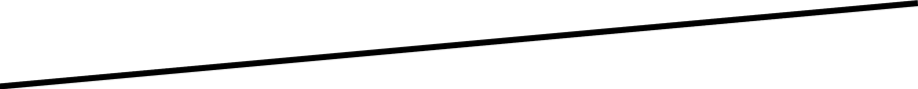

In [2]:
# Импорт изображения фрактала
img = Image.open("media/line_m_1.png")
img

In [3]:
# Берем массив из изображения
img_array = np.asarray(img)

In [4]:
# Размеры изображения в пикселях
img_array.shape

(89, 918, 4)

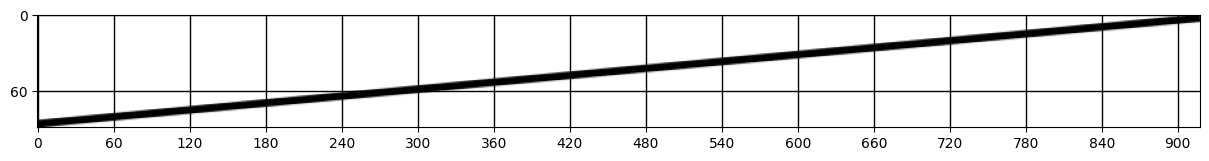

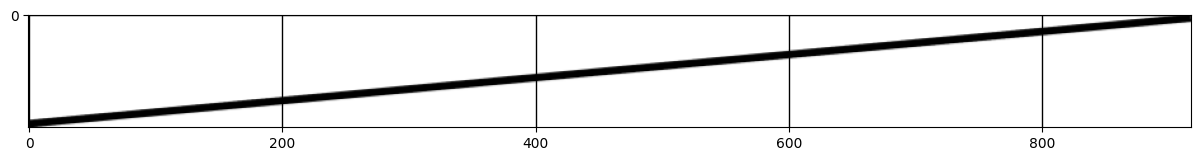

In [5]:
fig,axs = plt.subplots(1,figsize=(15,5))

# Наложение изображения
axs.imshow(img_array)

# Настройка шага сетки
varepsilon = 60

x_ticks = np.arange(0, img_array.shape[1], varepsilon)
y_ticks = np.arange(0, img_array.shape[0], varepsilon)

axs.set_xticks(x_ticks)
axs.set_yticks(y_ticks)

axs.grid(color='black', linestyle='-', linewidth=1)

plt.show()


# Пример крупной сетки
fig1,axs = plt.subplots(1,figsize=(15,5))
axs.imshow(img_array)
varepsilon = 200

x_ticks = np.arange(0, img_array.shape[1], varepsilon)
y_ticks = np.arange(0, img_array.shape[0], varepsilon)

axs.set_xticks(x_ticks)
axs.set_yticks(y_ticks)

axs.grid(color='black', linestyle='-', linewidth=1)

plt.show()

In [6]:
# Подсчет толщины линии
black_height = 10**9
current_height = 0

for x_coordinate in range(0, img_array.shape[1], 10):  # Итерируем по каждому столбцу
    column = img_array[:, x_coordinate]
    
    # Порог для темноты пикселей
    threshold = 50
    
    # Индексы строк, где есть черные пиксели
    black_pixel_indices = np.where(column < threshold)[0]
    black_pixel_indices = np.unique(black_pixel_indices)

    # Переменная для подсчета максимальной высоты подряд идущих черных пикселей
    for i in range(1, len(black_pixel_indices)):
        if black_pixel_indices[i] == black_pixel_indices[i-1] + 1:  # Если подряд
            current_height += 1
            
    current_height += 1        
    black_height = min(black_height, current_height)
    current_height = 1
    
    
if black_height == 10**9:
    black_height = 1
    
black_height

5

In [7]:
varepsilon = 60
cell_count = 0
threshold = black_height

for i in range(0, img_array.shape[0], varepsilon):
    for j in range(0, img_array.shape[1], varepsilon):
        # Определяем текущую ячейку
        cell = img_array[i:i+varepsilon, j:j+varepsilon]
        
        # Считаем не белые пиксели
        black_pixels = np.sum(cell < 50)/3 # Делим на 3, так как убираем учет трех цветов RGB
        
        # Если не белых пикселей больше порога, учитываем ячейку
        if black_pixels > threshold/2*varepsilon:
           cell_count += 1
        
            
cell_count

15

In [8]:
varepsilon_array = np.arange(black_height, 150, 1)
N_array = []

for e in varepsilon_array:
    cell_count = 0
    threshold = black_height

    for i in range(0, img_array.shape[0], e):
        for j in range(0, img_array.shape[1], e):
            cell = img_array[i:i+e, j:j+e]
            
            black_pixels = np.sum(cell < 50)/3 
            
            if black_pixels > threshold/2*e:
               cell_count += 1
            
    N_array.append(cell_count)

In [9]:
# Создание массивов для построения графика
log_1_e = np.array([np.log(1/e) for e in varepsilon_array]) 
log_N = np.array([np.log(n) for n in N_array])

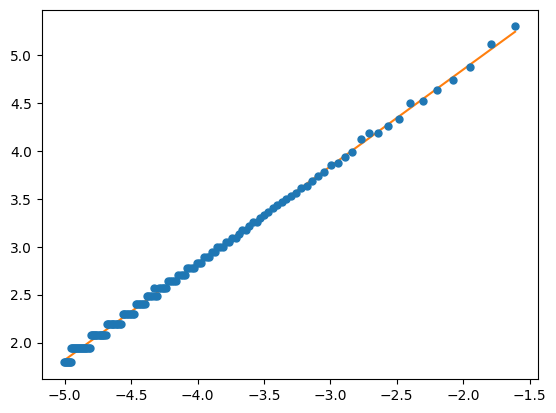

k = 1.01


In [10]:
plt.errorbar(log_1_e, log_N, fmt='o', capsize=1, linestyle='none', markersize=5,)

coefficients, cov = np.polyfit(log_1_e, log_N, 1, cov=True)
polynomial = np.poly1d(coefficients)
fit_values = polynomial(log_1_e)
slope = round(np.sqrt(cov[0][0]), 5)
plt.plot(log_1_e, fit_values)
k = coefficients[0]

plt.show()

print(f"k = {k:.2f}")